In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D,BatchNormalization, LSTM, CuDNNLSTM, MaxPooling2D
from keras.models import Sequential
from keras import regularizers
import keras

from keras.layers import TimeDistributed
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_dir = 'drive/MyDrive/archive/train'
val_dir = 'drive/MyDrive/archive/test'


image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2
)    

training_set = image_generator.flow_from_directory(batch_size=256,
                                                 directory=train_dir,
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
#                                                  color_mode = "grayscale"
                                                )

testing_set = image_generator.flow_from_directory(batch_size=128,
                                                 directory=val_dir,
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
#                                                  color_mode = "grayscale"
                                                 )

Mounted at /content/drive
Found 28719 images belonging to 7 classes.
Found 2465 images belonging to 7 classes.


In [ ]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
model = VGG19(
      input_shape = (48, 48, 3),
      include_top = False,
      weights = 'imagenet'
    )


80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
for layers in model.layers:
    layers.trainable = False

In [ ]:
x = Flatten()(model.output)
x = Dense(512, activation = "relu")(x)
x = Dropout(0.5)(x)
x = Dense(14, activation = "relu")(x)
x = Dense(7, activation = "softmax")(x)

model = keras.Model(model.input, x)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
hist = model.fit_generator(training_set, validation_data = testing_set , epochs = 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
113/113 [==============================] - 3766s 32s/step - loss: 1.7507 - accuracy: 0.2961 - val_loss: 1.5885 - val_accuracy: 0.4187
Epoch 2/5
113/113 [==============================] - 921s 8s/step - loss: 1.6645 - accuracy: 0.3394 - val_loss: 1.5996 - val_accuracy: 0.4434
Epoch 3/5
113/113 [==============================] - 911s 8s/step - loss: 1.6333 - accuracy: 0.3544 - val_loss: 1.5977 - val_accuracy: 0.4126
Epoch 4/5
113/113 [==============================] - 917s 8s/step - loss: 1.6241 - accuracy: 0.3588 - val_loss: 1.5730 - val_accuracy: 0.4264
Epoch 5/5
113/113 [==============================] - 921s 8s/step - loss: 1.6137 - accuracy: 0.3634 - val_loss: 1.5526 - val_accuracy: 0.4170


In [ ]:
hist = hist.history

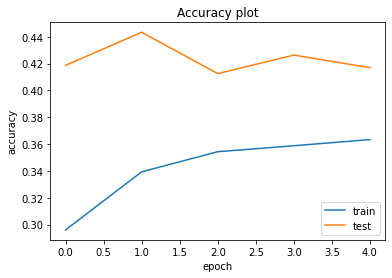

In [ ]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig("vgg19v2_accuracy.png")

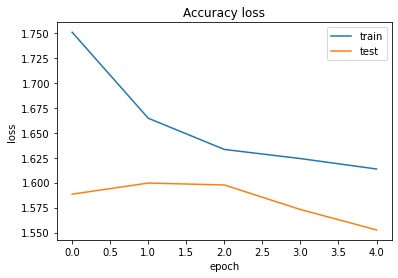

In [ ]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("vgg19v2_loss.png")

We can notice that the accuracy is increasing as the number of epochs is increasing and loss is decreasing as the epochs is increasing

In [ ]:
model.save("vgg19v2.h5")